In [1]:
from LIPA2.ilaplace import *
from LIPA2.qp_solver import *

from utils import *
from utils.interpolate_1D import *


import numpy as np
norm=np.linalg.norm

syms_def(locals(),' c0, c1 ,c0,c1,c2,c3,c4,b1, b2, b3, b4, g, a1, a2, a3, a4, g1')

tic();

import dill
dill.settings['recurse'] = True

fname='ilapi_numba.ipynb.picle'
if 0:
    #[p,d,q]=sym_reduce([g],[( [b1,b2,b3,b4] ,g  )]);
    [p,d,q]=sym_reduce([c0,c1,c2,c3],[( [b1,b2,b3,b4] ,g  )]);
    dill.dump([p,d,q],open(fname,'wb'))
else:
    [p,d,q]=dill.load(open(fname,'rb'))
    
#[p,d,q]=sym_reduce([c0 ,c1,c0,c1,c2,c3],[( [0,b1,b2,b3] ,g  )]);

toc('reduce:')
#jo=arg2jso(c1=1.1,c2=2.3,c3=1.11,c4=21,c0=10j,g=3.11,g1=2j,b1=2.1,b2=1.2,b3=1.1j,a4=2)
jo={
    
    c0:-.5+250j,
    c1:-.5-265.5j,
    c2:-1.5+258j,
    c3:-1.5-268j,
    c4:-21,
    
    g:-57.5+260j,
    #g:0,                
    b1:10,
    b2:-1j,
    b3:3,
    b4:11,
    }



tic();
nd=0

[GF,exg]=ilaplace_functor(p,jo,nd)
[F,exf]=ilaplace_functor(q,jo)



toc('functors:')



reduce: 0.046042 sec
functors: 0.545321 sec


0.5453209000000019

''

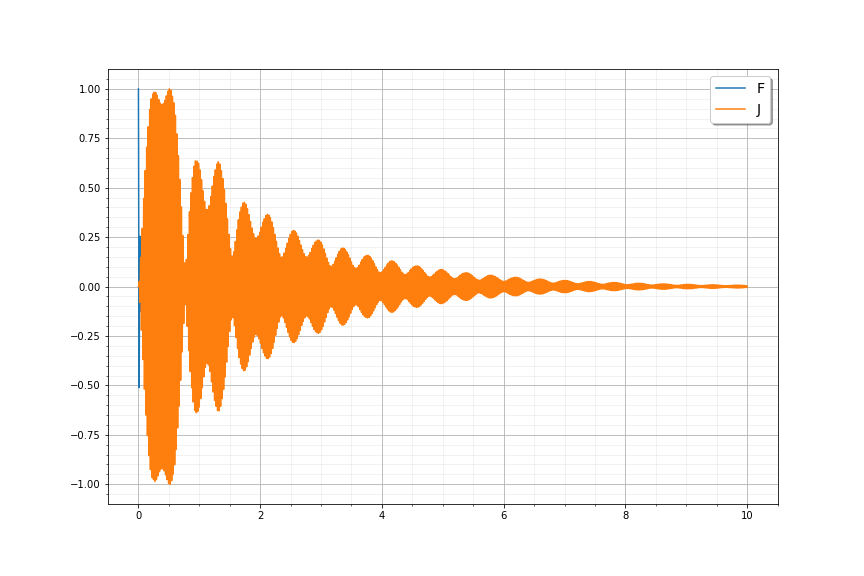

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib widget
#fig=plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))
#fig.suptitle('sensors data + pure response ', fontsize=16)
ax.grid(True,which='major')
ax.minorticks_on()
ax.grid(True,which='minor',alpha=0.2)
tt=np.linspace(0,10,7200)
rn=lambda x: x.real/np.max(np.abs(x.real))
#plt.plot(tt,rn(F(tt)),tt,rn(GF(tt)))
ax.plot(tt,rn(F(tt)),label='F')
ax.plot(tt,rn(GF(tt)),label='J');
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
''


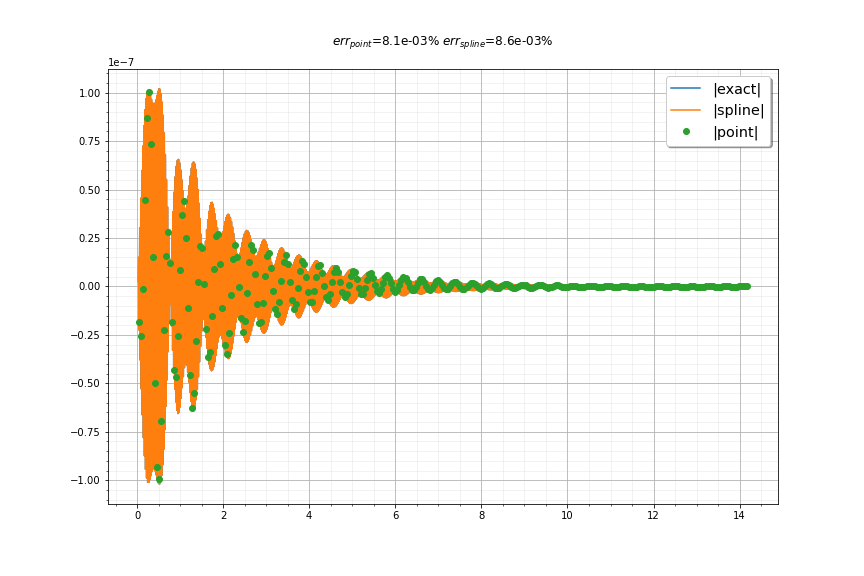

In [3]:
[DC,QP,G,FF]=make_lipa_data(d,q,jo);

LM=[6,8];
LM=[10,12];
LM=[8,14];
LM=[8,16];
LM=[8,18];
dt=0.0225*1.8;
#dt=0.0225*1.5;
dt=0.0225*2.1;
#dt=0.0225*2.5;

'''
LM=[4,8]
LM=[2,4]
dt=0.000225*1.8

LM=[4,4]

dt=0.0000225*1.8


print(QP.shape)
print(G.shape)
print(FF.shape)
'''
lqp=lipa_qp_number(DC,LM=LM,FF=FF,qp=QP,g=G,nd=14).reset(dt);

nt=300
tt=dt*np.arange(1,nt+1)
tm=np.max(tt)
#ttx=np.linspace(tt[0],tm,80000)
ttx=np.linspace(2*tt[0]/3,tm,80000)

x=GF(tt)
ynn=lqp.dump(nt)
ynn=ynn.reshape(ynn.shape[0],-1).T
y=ynn[nd]
deg=ynn.shape[0]-1
jG=jet_spline(tt,ynn,deg=deg)

err=norm(x-y)/norm(x);
#err=norm(np.abs(x)-np.abs(y))/norm(x);
errs=norm(jG(ttx)-GF(ttx))/norm(GF(ttx));
#fig2=plt.figure(figsize=(12,8))
fig2, ax2 = plt.subplots(figsize=(12,8))
rn = lambda x : np.real(x)
#rn = lambda x : x.real
if 1:
    
    
    
    ax2.plot(ttx,rn(GF(ttx)),label='|exact|');
    
    ax2.plot(ttx,rn(jG(ttx)),label='|spline|');   
    
    ax2.plot(tt,rn(y), marker='o',linewidth=0,label='|point|');
    
    
else:
    ax2.plot(tt,y.real, marker='o',linewidth=0,label='step point');
legend = ax2.legend(loc='upper right', shadow=True, fontsize='x-large');
ax2.grid(True,which='major')
ax2.minorticks_on()
ax2.grid(True,which='minor',alpha=0.2)

#print(x)    
#print(y[0])    
s=sprintf('$err_{point}$=%3.1e%% $err_{spline}$=%3.1e%%\n',100*err,100*errs);

ax2.set_title(s);

In [ ]:
nn=12
y[nn]-jG(tt[nn]),FF,DC

In [ ]:
%%javascript
var nb = IPython.notebook;
var kernel = IPython.notebook.kernel;
var command = "NOTEBOOK_FULL_PATH='" + nb.base_url + nb.notebook_path + "'";
kernel.execute(command);

In [ ]:
NOTEBOOK_FULL_PATH

In [ ]:
urllib.request('http://127.0.0.1:8888/api/sessions')

In [ ]:
dir(urllib.request)

In [ ]:
type(q)

In [ ]:
p

In [ ]:
q

In [ ]:
p